In [38]:
import pandas as pd
from sklearn.cluster import KMeans

In [39]:
nom_feuille = "Standardized Data"
data = pd.read_excel("liqueurs - correction.xlsx", sheet_name=nom_feuille)
data.head()

,MEOH,ACET,BU1,ISOP,MEPR,PRO1,ACAL
0,-0.277842,-0.662107,0.142831,-0.464090,-0.439503,-0.474451,-0.481664
1,0.208846,-0.125096,0.347449,-0.296004,-0.246523,-0.327029,-0.131924
2,0.958236,-0.139610,0.142831,0.586447,0.911359,-0.637598,-0.044489
3,0.026338,-0.669364,-0.511946,-0.905316,-0.777219,-0.319166,-0.516638
4,1.262416,0.012785,0.654376,0.355329,0.573643,0.262660,0.217816


In [40]:
data.info()
data.head()

#afficher les statistiques descriptives
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEOH    102 non-null    float64
 1   ACET    102 non-null    float64
 2   BU1     102 non-null    float64
 3   ISOP    102 non-null    float64
 4   MEPR    102 non-null    float64
 5   PRO1    102 non-null    float64
 6   ACAL    102 non-null    float64
dtypes: float64(7)
memory usage: 5.7 KB


,MEOH,ACET,BU1,ISOP,MEPR,PRO1,ACAL
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,-4.244970e-17,1.322472e-16,8.000137e-17,-9.578395e-17,5.659961e-17,-1.088454e-18,-6.802837e-17
std,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00,1.004938e+00
min,-2.232893e+00,-1.518421e+00,-1.391803e+00,-1.997874e+00,-1.790365e+00,-6.906700e-01,-1.268580e+00
25%,-8.495633e-01,-7.074624e-01,-1.182070e+00,-5.218696e-01,-5.359933e-01,-5.923886e-01,-5.231960e-01
50%,2.351163e-01,-2.956333e-01,2.451403e-01,-1.384237e-01,-2.224003e-01,-3.801006e-01,-3.067942e-01
75%,7.632840e-01,7.167043e-01,6.543761e-01,4.393716e-01,3.806631e-01,2.597116e-01,1.303811e-01
max,2.047755e+00,3.866199e+00,3.109791e+00,3.212789e+00,4.336759e+00,5.200320e+00,6.950317e+00


<Axes: xlabel='BU1', ylabel='MEPR'>

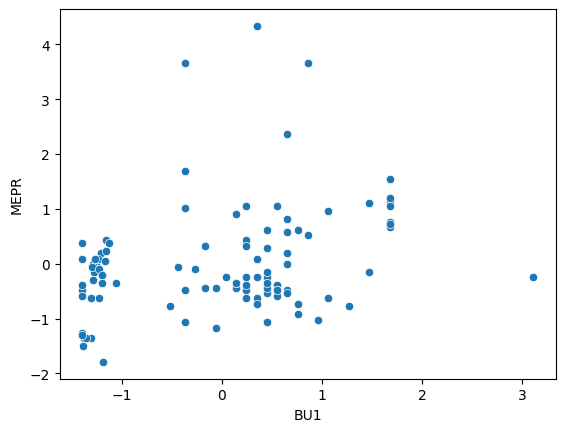

In [41]:
#graphique scatterplot 
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x='BU1', y='MEPR')

In [42]:
#algorithme de kmeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(data) 

#afficher l'inertie 
print(kmeans.inertia_)

#les groupes des observations
print(kmeans.labels_) 

#Quels sont les effectifs des groupes ? ([52, 24, 26]).
import numpy as np
pd.Series(kmeans.labels_).value_counts()
print(f"il y a {np.unique(kmeans.labels_).size} groupes")
print(pd.Series(kmeans.labels_).value_counts())

467.11790529212533
[0 0 2 0 2 0 2 1 0 2 2 0 0 0 1 2 0 1 0 1 0 0 1 1 0 0 2 0 2 0 2 0 0 0 0 0 0
 1 0 2 1 0 2 1 0 1 0 1 0 2 1 1 0 2 0 0 2 0 0 1 1 0 2 0 2 0 0 1 1 0 2 1 2 1
 2 0 1 2 1 0 2 0 0 0 0 2 2 0 0 2 0 0 1 1 0 2 2 0 1 0 0 0]
il y a 3 groupes
0    52
2    26
1    24
Name: count, dtype: int64


In [43]:
B = data.copy()
B["label"] = kmeans.labels_
B.head()

,MEOH,ACET,BU1,ISOP,MEPR,PRO1,ACAL,label
0,-0.277842,-0.662107,0.142831,-0.464090,-0.439503,-0.474451,-0.481664,0
1,0.208846,-0.125096,0.347449,-0.296004,-0.246523,-0.327029,-0.131924,0
2,0.958236,-0.139610,0.142831,0.586447,0.911359,-0.637598,-0.044489,2
3,0.026338,-0.669364,-0.511946,-0.905316,-0.777219,-0.319166,-0.516638,0
4,1.262416,0.012785,0.654376,0.355329,0.573643,0.262660,0.217816,2


<Axes: xlabel='BU1', ylabel='MEPR'>

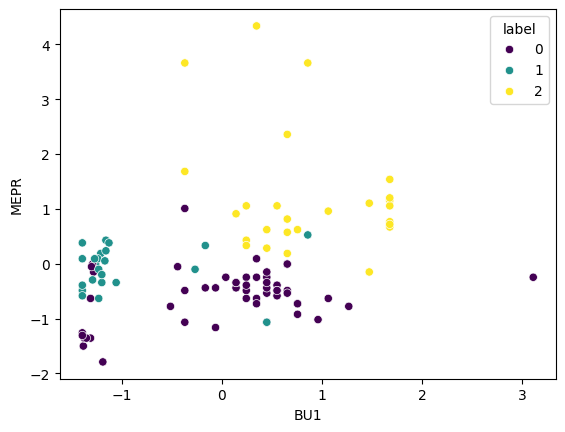

In [49]:
#graphe des groupes
sns.scatterplot(data=B, x='BU1', y='MEPR', hue='label', palette='viridis')

In [51]:
B.groupby("label").mean()


,MEOH,ACET,BU1,ISOP,MEPR,PRO1,ACAL
label,,,,,,,
0,-0.111766,-0.210923,0.040916,-0.634196,-0.570321,-0.217294,-0.316378
1,-0.763667,0.711957,-1.002176,0.109328,-0.081283,0.879139,0.614917
2,0.928456,-0.235345,0.843254,1.167474,1.215674,-0.376925,0.065141


In [52]:
#exporter les données
B.to_excel("liqueurs avec groupes.xlsx", index=False)